#  Pruebas con IBM Quantum Platform Classic.

---

---

#### **Autor:** *Héctor Ayuso Martín*

![Imagen introduccion](assets/end.png
)

## Hello World del entrelazamiento cuántico: Estado de Bell de 2 qubits". ##

> Introducción práctica al entrelazamiento cuántico

Contexto inicial:

Se le llama "Hello World" porque es el ejemplo más simple y fundamental para demostrar cómo funciona un sistema cuántico con dos qubits, similar a cómo en programación clásica el primer ejercicio suele ser imprimir "Hello, World!'. Aquí en lugar de imprimir texto, mostramos el comportamiento básico del entrelazamiento cuántico, que es un concepto clave en la computación cuántica.

El entrelazamiento significa que los dos qubits están correlacionados de tal forma que, sin importar la distancia entre ellos, sus valores siempre estarán sincronizados. Es decir, si mides uno y obtienes un 0, el otro será 0, y si obtienes un 1, el otro será 1. Esto ocurre porque, en el estado de Bell, los qubits existen en una superposición compartida, lo que significa que no tienen un valor fijo hasta que se miden.

Este experimento demuestra un principio fundamental de la mecánica cuántica: el resultado de medir un qubit afecta instantáneamente al otro, lo que es una propiedad esencial para la computación cuántica y la criptografía cuántica.
En términos prácticos, esto se implementa con Qiskit creando un circuito cuántico con dos qubits, aplicando una puerta Hadamard (H) al primer qubit para ponerlo en superposición y luego una puerta CNOT (CX) para entrelazarlo con el segundo qubit. Luego se miden ambos qubits para ver la correlación en los resultados. En simulaciones, esto se verá reflejado en un histograma donde los únicos resultados posibles serán 00 y 11, mostrando que los qubits están entrelazados.
Llamamos a esto "Hello World" de la computación cuántica porque es la primera prueba sencilla que permite ver en acción uno de los fenómenos más importantes de la mecánica cuántica y la base para sistemas más avanzados, como algoritmos de corrección de errores y comunicación cuántica segura.

---

#### Paso 1: Representar el problema utulizando circuitos cuanticos y operadores ####

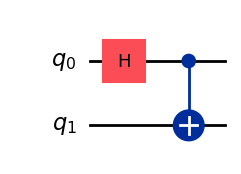

In [ ]:
#Paso 1: Representar el problema utulizando circuitos cuanticos y operadores.

from qiskit import QuantumCircuit

qc = QuantumCircuit(2)

qc.h(0)
qc.cx(0,1)

qc.draw('mpl')

In [ ]:
from qiskit.quantum_info import Pauli

ZZ = Pauli('ZZ')
ZI = Pauli('ZI')
IZ = Pauli('IZ')
XX = Pauli('XX')
XI = Pauli('XI')
IX = Pauli('IX')

observables = [ ZZ,ZI,IZ,XX,XI,IX] #[Bug#01](Faltaba en la lista  el observable ZZ)

#### Paso 2: Optimizar. ####

En este ejemplo no se optimizará, debido a que el circuito será ejecutado en un simulador local y no en una QPU real. Los bloques de circuito y la algoritmia cuántica que sí vayan a ser procesados en QPUs reales deberán optimizarse para mejorar su estabilidad, evitar el mayor ruido de fondo posible y aumentar su productividad.

Recordemos que, a día de hoy, 28 de febrero de 2025, los qubits siguen siendo muy inestables y producen muchos errores debido a esa inestabilidad, lo que se refleja a la hora de graficar, por ejemplo, el colapso de un qubit en superposición estando entrelazado con otro. Como sabemos, estos dos qubits deberían acabar colapsando en |00) o |11), pero, como podríamos comprobar en los resultados graficados en una QPU real, también concluiríamos que, en muy poca medida, 'colapsan falsamente' en |01) y |10) por ruido de decoherencia o errores en la medición del qbit.

#### Paso 3: Ejecutar en el Simulador Backend ####

In [ ]:
from qiskit_aer.primitives import Estimator

estimator = Estimator()

job = estimator.run([qc] * len(observables), observables)

job.result()

print(type(job.result().values)) #Verificamos el tipo de values() para saber como acceder a los resultados.
print(job.result().values)      #Imprimimos los resultados para saber que tienen.

#Verificando cantidad de elementos:
print(f'Número de observables: {len(observables)}')
print(f'Número de valores devueltos: {len(job.result().values)}')
#Si el número de valores devueltos tiene menos elementos que el número de observables, entonces hay un problema en la longitud de los datos.

<class 'numpy.ndarray'>
[ 1.          0.06640625  0.06640625  1.         -0.0390625  -0.0390625 ]
Número de observables: 6
Número de valores devueltos: 6


#### Paso 4: Post-Procesado y graficado. ####

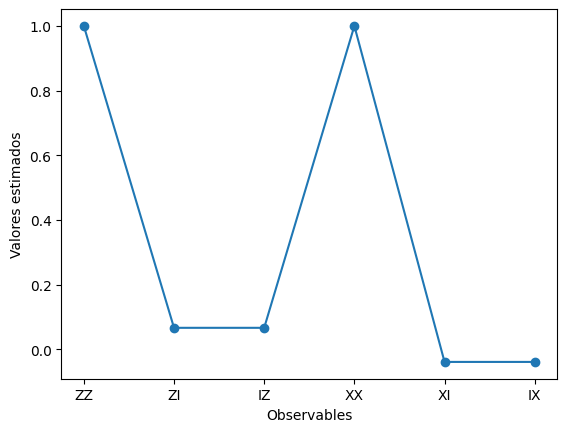

In [ ]:
import matplotlib.pyplot as plt

data = ['ZZ' , 'ZI' , 'IZ' , 'XX' , 'XI' , 'IX']
values = job.result().values

plt.plot(data,values,'-o')
plt.xlabel('Observables')
plt.ylabel('Valores estimados')
plt.show()

#

Explicación final:

Este cuaderno es una introducción a la programación cuántica usando IBM Quantum Platform. La idea principal es entender cómo funciona un sistema cuántico de dos qubits y cómo interactúan entre sí mediante un estado de Bell. Es un primer paso para ver en acción el entrelazamiento cuántico, un fenómeno esencial en la computación cuántica.

Para ello, se crea un circuito cuántico con dos qubits. Primero, se aplica una puerta Hadamard al primer qubit. Esto lo pone en superposición, es decir, no está en 0 ni en 1, sino en una mezcla de ambos estados al mismo tiempo. Luego, se aplica una puerta CNOT, que entrelaza ese primer qubit con el segundo. Esto significa que, cuando midamos uno de ellos, el otro cambiará automáticamente su valor para estar correlacionado.

El circuito se ejecuta en un simulador o en un procesador cuántico real (QPU). Si usamos un simulador, los resultados serán exactos y mostrarán solo los estados esperados (00 o 11). Sin embargo, si lo ejecutamos en un procesador real, pueden aparecer errores debido a la inestabilidad de los qubits, ruidos del sistema o imperfecciones en las puertas cuánticas. Esto podría hacer que, ocasionalmente, aparezcan estados 01 o 10 en los resultados, aunque en teoría no deberían existir.

El gráfico final muestra la probabilidad de cada posible resultado. Si todo funciona correctamente, los estados 00 y 11 deberían tener probabilidades cercanas al 50% y los estados 01 y 10 deberían aparecer muy poco o nada. Si hay ruido cuántico, podríamos ver una distribución diferente.

Los "observables" en este contexto son propiedades que se pueden medir del sistema cuántico, como si los qubits están alineados o no. La lista "data" representa los distintos observables que estamos analizando en el experimento, y los valores obtenidos reflejan lo que el sistema cuántico ha medido. Con esto, podemos evaluar la fidelidad del entrelazamiento y detectar posibles errores en la ejecución.

Este experimento es un primer acercamiento a la computación cuántica. A partir de aquí, se pueden explorar técnicas para minimizar errores y mejorar la calidad de los cálculos cuánticos en hardware real.

![Imagen introduccion](assets/sdk.webp
)

---

> Barcelona, 28 de Febrero de 2025 